In [1]:
# import all important library

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
# import our dataset

data =  pd.read_csv('Covid_19_Clean_Complete.csv')
df = pd.DataFrame(data) 
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


# check all null values in our dataset

In [4]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

# check all duplicated record 

In [5]:
df.duplicated().sum()

0

# check all columns name

In [15]:
df.columns

Index(['state', 'country', 'lat', 'long', 'date', 'confirmed', 'death',
       'recovered', 'active', 'WHO Region'],
      dtype='object')

# Rename all columns name. 

In [16]:
df.rename(columns = {'Province/State' : 'state', 'Country/Region': 'country', 'Lat':'lat', 'Long':'long', 'Date':'date', 'Confirmed':'confirmed',
       'Deaths':'death', 'Recovered':'recovered', 'Active':'active'}, inplace = True)

# Check all dtypes of our columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       14664 non-null  object 
 1   country     49068 non-null  object 
 2   lat         49068 non-null  float64
 3   long        49068 non-null  float64
 4   date        49068 non-null  object 
 5   confirmed   49068 non-null  int64  
 6   death       49068 non-null  int64  
 7   recovered   49068 non-null  int64  
 8   active      49068 non-null  int64  
 9   WHO Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [18]:
# calculate all active cases. 

df['active'] = df['confirmed']-df['death']-df['recovered']
df['active']

0           0
1           0
2           0
3           0
4           0
         ... 
49063     117
49064     375
49065      19
49066    1147
49067     365
Name: active, Length: 49068, dtype: int64

In [21]:
# when did covid19 start ? 

start = df['date'].min()
print(f'Covid19 start at :{start}')

Covid19 start at :2020-01-22


In [23]:
# when did covid19 finish ? 

finish = df['date'].max() 
print(f'Covid19 Finish at :{finish}')

Covid19 Finish at :2020-07-27


In [29]:
# how many countries are there

country = df['country'].nunique()
print(f'Total country are :{country}')

Total country are :187


In [30]:
# how many state are there. 

state = df['state'].nunique() 
print(f'Total State are :{state}')

Total State are :78


In [46]:
# check country with date wise acive, death, confirmed, recovered cases

world = df.groupby(by='country')[['date', 'confirmed', 'death', 'recovered', 'active']].sum().reset_index()
world 

,country,date,confirmed,death,recovered,active
0,Afghanistan,2020-01-222020-01-232020-01-242020-01-252020-0...,1936390,49098,798240,1089052
1,Albania,2020-01-222020-01-232020-01-242020-01-252020-0...,196702,5708,118877,72117
2,Algeria,2020-01-222020-01-232020-01-242020-01-252020-0...,1179755,77972,755897,345886
3,Andorra,2020-01-222020-01-232020-01-242020-01-252020-0...,94404,5423,69074,19907
4,Angola,2020-01-222020-01-232020-01-242020-01-252020-0...,22662,1078,6573,15011
...,...,...,...,...,...,...
182,West Bank and Gaza,2020-01-222020-01-232020-01-242020-01-252020-0...,233461,1370,61124,170967
183,Western Sahara,2020-01-222020-01-232020-01-242020-01-252020-0...,901,63,648,190
184,Yemen,2020-01-222020-01-232020-01-242020-01-252020-0...,67180,17707,23779,25694
185,Zambia,2020-01-222020-01-232020-01-242020-01-252020-0...,129421,2643,83611,43167


In [38]:
# check total no of confirm cases on particular date

date_confirm_case = df.groupby(by='date')['confirmed'].sum().reset_index() # It makes the resulting DataFrame easier to work with for subsequent operations, such as filtering or merging.
date_confirm_case[date_confirm_case['date']=='2020-07-27']

,date,confirmed
187,2020-07-27,16480485


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


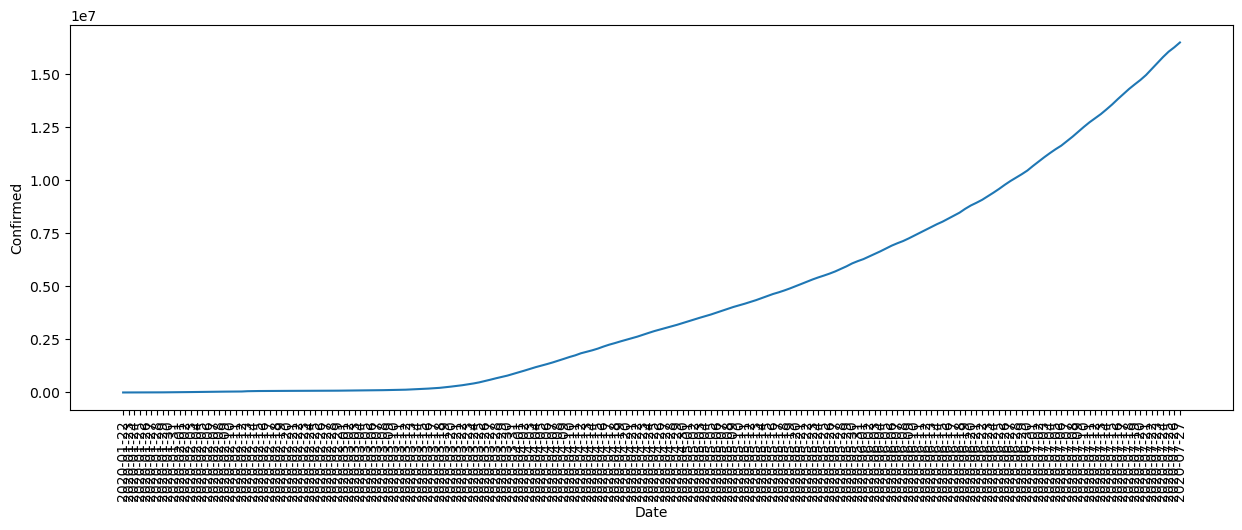

In [51]:
# We can plot line plot for date_confirm_case

plt.figure(figsize=(15,5))
sns.lineplot(x='date', y='confirmed', data=date_confirm_case,  markers='*') 
plt.xlabel('Date')
plt.ylabel('Confirmed')
plt.xticks(rotation=90)
plt.show()                                                                                                                                                                                                                                                                          

In [53]:
# check total no of death cases on particular date

death_case = df.groupby(by='country')['date'].sum().reset_index() 
death_case[death_case['date']=='2020-07-27']

,country,date


In [64]:
#Top 10 countries with most Confirmed cases. 

top_conf = df.groupby(by='country')['confirmed'].sum().sort_values(ascending=False).reset_index() 
top10_conf = top_conf.head(10)

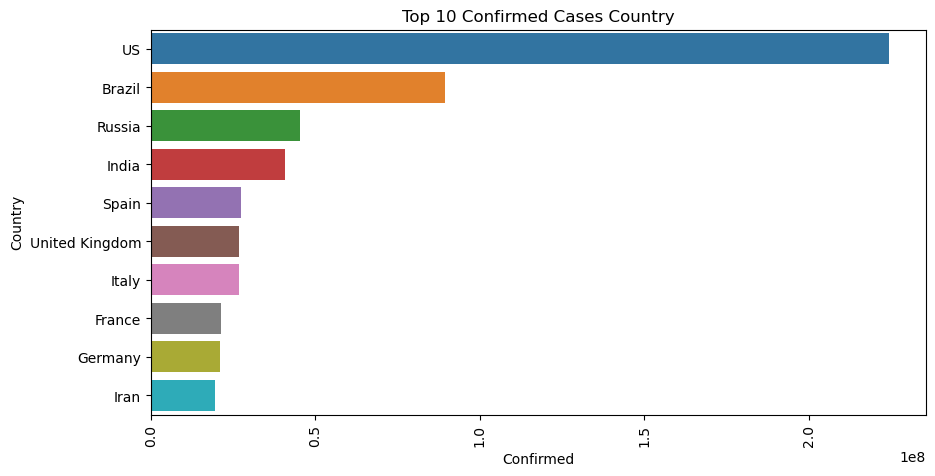

In [67]:
# we can plot bar graph for Top 10 countries with most Confirmed cases.

plt.figure(figsize=(10,5))
sns.barplot(y='country', x='confirmed', data=top10_conf)
plt.ylabel('Country')
plt.xlabel('Confirmed')
plt.xticks(rotation=90)
plt.title('Top 10 Confirmed Cases Country')
plt.show()

In [69]:
# Top 10 countries with most Death cases. 

top_death = df.groupby(by='country')['death'].sum().sort_values(ascending=False).reset_index()
top10_death = top_death.head(10)
top10_death 

,country,death
0,US,11011411
1,United Kingdom,3997775
2,Brazil,3938034
3,Italy,3707717
4,France,3048524
5,Spain,3033030
6,Mexico,1728277
7,India,1111831
8,Iran,1024136
9,Belgium,963679


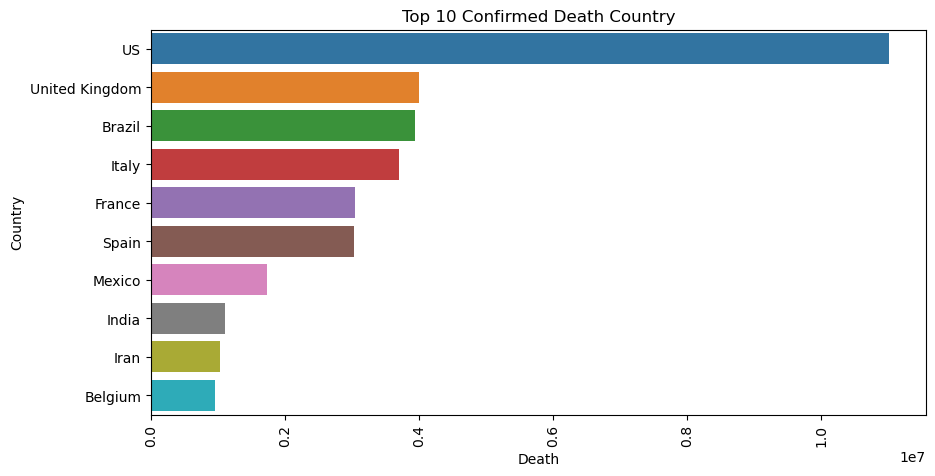

In [70]:
# we can plot bar graph for Top 10 countries with most Death cases.

plt.figure(figsize=(10,5))
sns.barplot(x='death', y='country', data=top10_death)
plt.xlabel('Death')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.title('Top 10 Confirmed Death Country')
plt.show()

In [73]:
# Top 10 countries with most Active cases. 

top_active = df.groupby(by='country')['active'].sum().sort_values(ascending=False).reset_index()
top10_active = top_active.head(10)
top10_active

,country,active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


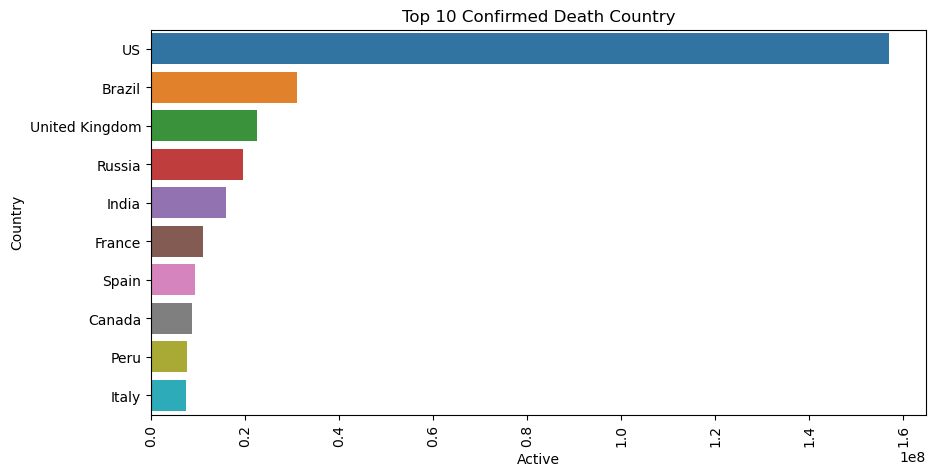

In [76]:
# we can plot bar graph for Top 10 countries with most Active cases.

plt.figure(figsize=(10,5))
sns.barplot(x='active', y='country', data=top10_active)
plt.xlabel('Active')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.title('Top 10 Confirmed Active Country')
plt.show()

In [79]:
# Top 10 countries with most Recovered cases. 

top_recover=df.groupby('country')['recovered'].sum().sort_values(ascending=False).reset_index()
top10_recover=top_recover.head(10)
top10_recover

,country,recovered
0,US,56353416
1,Brazil,54492873
2,Russia,25120448
3,India,23783720
4,Germany,17107839
5,Italy,15673910
6,Iran,15200895
7,Spain,15093583
8,Turkey,13345389
9,Chile,13292593


# Now we are going to compare top 5 countries. 

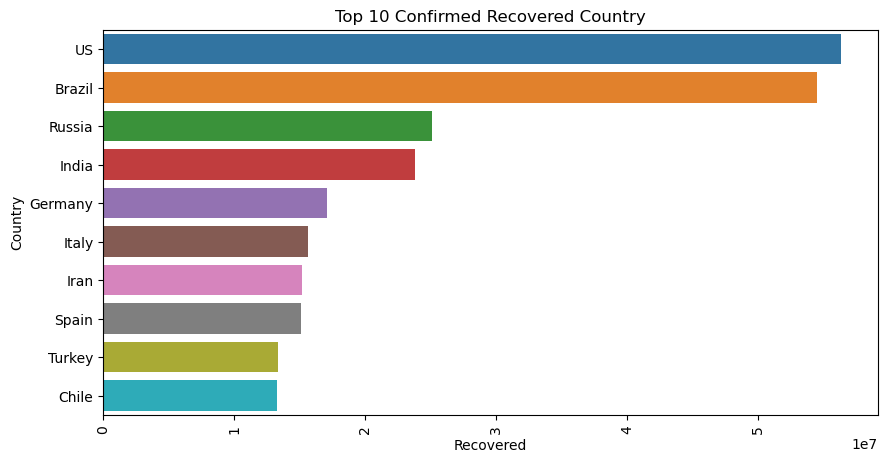

In [83]:
# We can plot bar graph for Top 10 countries with most Recoverd cases.

plt.figure(figsize=(10,5))
sns.barplot(x='recovered', y='country', data=top10_recover)
plt.xlabel('Recovered')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.title('Top 10 Confirmed Recovered Country')
plt.show()

In [87]:
df['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

In [120]:
# Data of US

US = df[df['country']=='US']
US = us.groupby(by = 'date')[['recovered', 'death', 'confirmed', 'active']].sum().reset_index()
US

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [126]:
# Data of Brazil

Brazil = df[df['country']=='Brazil']
Brazil = Brazil.groupby(by = 'date')[['recovered', 'death', 'confirmed', 'active']].sum().reset_index()
Brazil

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [122]:
# Data of Russia

Russia = df[df['country']=='Russia']
Russia = Russia.groupby(by = 'date')[['recovered', 'death', 'confirmed', 'active']].sum().reset_index()
Russia

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


In [123]:
# Data of India

India = df[df['country']=='India']
India = India.groupby(by = 'date')[['recovered', 'death', 'confirmed', 'active']].sum().reset_index()
India

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


In [124]:
# Data of Germany

Germany = df[df['country']=='Germany']
Germany = Germany.groupby(by = 'date')[['recovered', 'death', 'confirmed', 'active']].sum().reset_index()
Germany

,date,recovered,death,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,189140,9110,204881,6631
184,2020-07-24,189696,9120,205623,6807
185,2020-07-25,189919,9124,206278,7235
186,2020-07-26,190055,9124,206667,7488


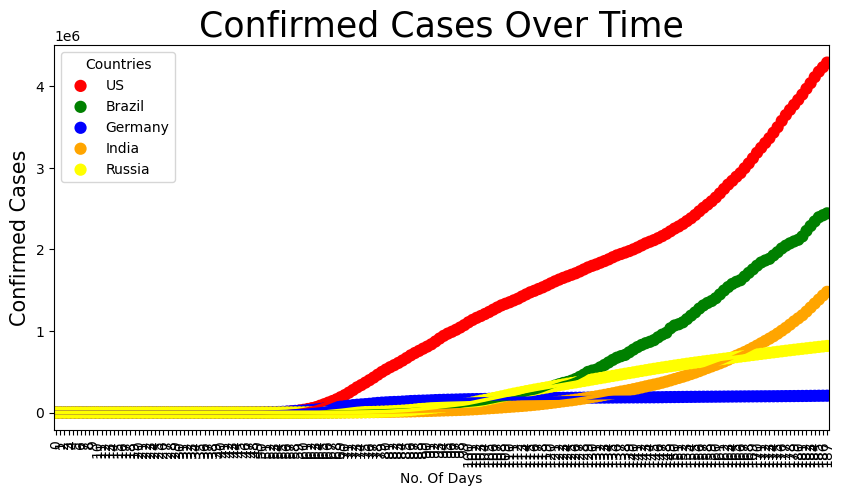

In [125]:
# plot a graph Confirmed Cases over time

plt.figure(figsize=(10, 5))

sns.pointplot(x=US.index, y=US.confirmed, color='red', label='US')
sns.pointplot(x=Brazil.index, y=Brazil.confirmed, color='green', label='Brazil')
sns.pointplot(x=Germany.index, y=Germany.confirmed, color='blue', label='Germany')
sns.pointplot(x=India.index, y=India.confirmed, color='orange', label='India')
sns.pointplot(x=Russia.index, y=Russia.confirmed, color='yellow', label='Russia')

plt.title('Confirmed Cases Over Time', fontsize=25)
plt.xlabel('No. Of Days')
plt.ylabel('Confirmed Cases', fontsize=15)
plt.xticks(rotation=90)
plt.legend(title="Countries")
plt.show()

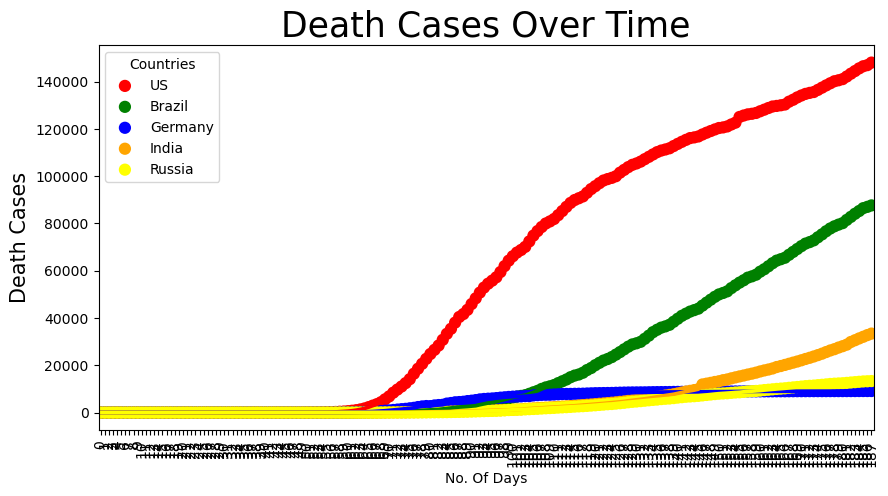

In [128]:
# plot a graph Death Cases over time

plt.figure(figsize=(10, 5))

sns.pointplot(x=US.index, y=US.death, color='red', label='US')
sns.pointplot(x=Brazil.index, y=Brazil.death, color='green', label='Brazil')
sns.pointplot(x=Germany.index, y=Germany.death, color='blue', label='Germany')
sns.pointplot(x=India.index, y=India.death, color='orange', label='India')
sns.pointplot(x=Russia.index, y=Russia.death, color='yellow', label='Russia')

plt.title('Death Cases Over Time', fontsize=25)
plt.xlabel('No. Of Days')
plt.ylabel('Death Cases', fontsize=15)
plt.xticks(rotation=90)
plt.legend(title="Countries")
plt.show()

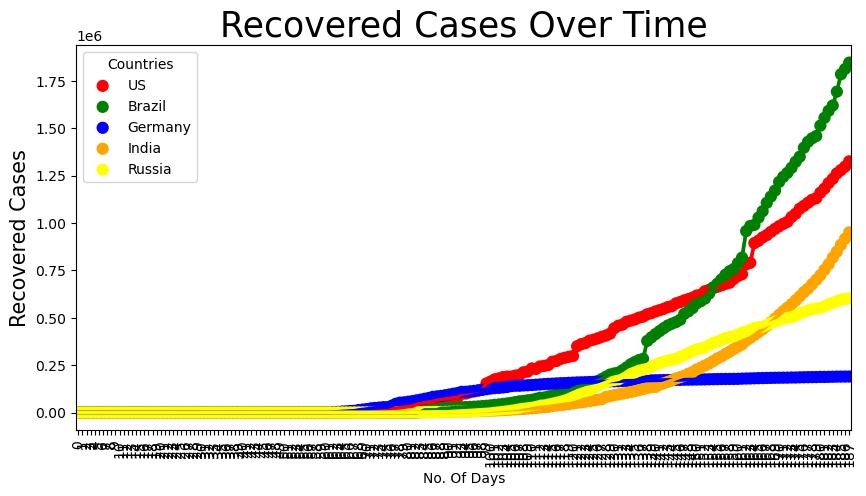

In [129]:
# plot a graph Recoverd Cases over time

plt.figure(figsize=(10, 5))

sns.pointplot(x=US.index, y=US.recovered, color='red', label='US')
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color='green', label='Brazil')
sns.pointplot(x=Germany.index, y=Germany.recovered, color='blue', label='Germany')
sns.pointplot(x=India.index, y=India.recovered, color='orange', label='India')
sns.pointplot(x=Russia.index, y=Russia.recovered, color='yellow', label='Russia')

plt.title('Recovered Cases Over Time', fontsize=25)
plt.xlabel('No. Of Days')
plt.ylabel('Recovered Cases', fontsize=15)
plt.xticks(rotation=90)
plt.legend(title="Countries")
plt.show()

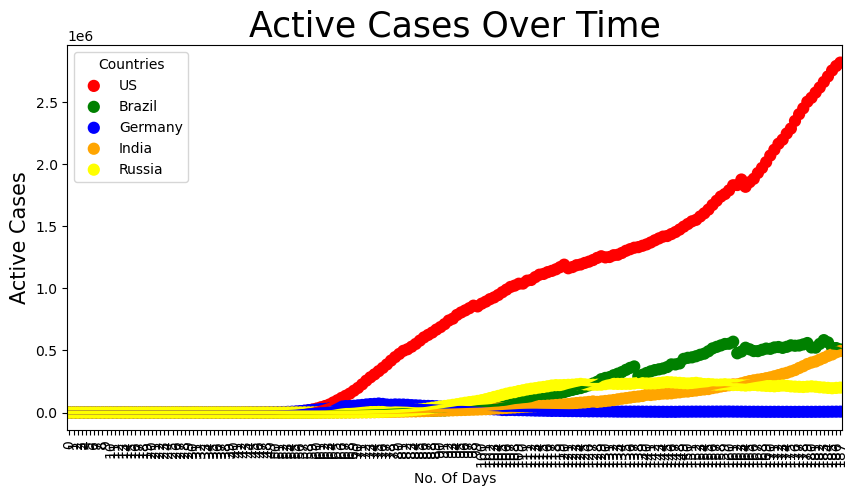

In [133]:
# Plot a graph Recoverd Cases over time

plt.figure(figsize=(10, 5))

sns.pointplot(x=US.index, y=US.active, color='red', label='US')
sns.pointplot(x=Brazil.index, y=Brazil.active, color='green', label='Brazil')
sns.pointplot(x=Germany.index, y=Germany.active, color='blue', label='Germany')
sns.pointplot(x=India.index, y=India.active, color='orange', label='India')
sns.pointplot(x=Russia.index, y=Russia.active, color='yellow', label='Russia')

plt.title('Active Cases Over Time', fontsize=25)
plt.xlabel('No. Of Days')
plt.ylabel('Active Cases', fontsize=15)
plt.xticks(rotation=90)
plt.legend(title="Countries")
plt.show()

# Model building

In [ ]:
Facebook prophet-2017 by facebook datascience research department
2 columns,1- date, 2- value

In [ ]:
# short form

date, confirmed
ds,y

In [ ]:
# y(t)=g(t)+s(t)+h(t)+e(t)
# y(t)-forecast
# g(t)-trends
# s(t)-seasonality
# h(t)-holiday effects
# e(t)-error term

In [135]:
# We can convert the dtype of 'Date' column into Datetime dtype.  

df['date'] = pd.to_datetime(df['date'])
df['date'].astype

<bound method NDFrame.astype of 0       2020-01-22
1       2020-01-22
2       2020-01-22
3       2020-01-22
4       2020-01-22
           ...    
49063   2020-07-27
49064   2020-07-27
49065   2020-07-27
49066   2020-07-27
49067   2020-07-27
Name: date, Length: 49068, dtype: datetime64[ns]>

In [136]:
Confirmed_date = df.groupby(by = 'date')['confirmed'].sum().reset_index()
Confirmed_date

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [137]:
# We can remane the column name ('Date' : 'ds', 'Confirmed' : 'y' )

Confirmed_date.columns=['ds','y']
Confirmed_date

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


# Install prophet library

In [138]:
!pip install prophet

In [139]:
#importing prophet model

from prophet import Prophet

In [140]:
model = Prophet()
model.fit(Confirmed_date)

12:25:18 - cmdstanpy - INFO - Chain [1] start processing
12:25:19 - cmdstanpy - INFO - Chain [1] done processing


# Forecasting for next 7 periods/7 Days

In [141]:
future = model.make_future_dataframe(15,freq='D',include_history=True)
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
198,2020-08-07
199,2020-08-08
200,2020-08-09
201,2020-08-10


In [142]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.356186e+03,-1.231559e+05,8.791984e+04,-9.356186e+03,-9.356186e+03,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,-10986.210444,0.0,0.0,0.0,-2.034240e+04
1,2020-01-23,-6.667734e+03,-1.054511e+05,9.507976e+04,-6.667734e+03,-6.667734e+03,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,-1078.891654,0.0,0.0,0.0,-7.746625e+03
2,2020-01-24,-3.979282e+03,-9.415246e+04,1.142567e+05,-3.979282e+03,-3.979282e+03,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,6.123967e+03
3,2020-01-25,-1.290830e+03,-8.939742e+04,1.306811e+05,-1.290830e+03,-1.290830e+03,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.237938e+04
4,2020-01-26,1.397622e+03,-9.450292e+04,1.088288e+05,1.397622e+03,1.397622e+03,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,8.615766e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2020-08-07,1.838321e+07,1.825495e+07,1.854903e+07,1.829210e+07,1.848451e+07,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,10103.249373,0.0,0.0,0.0,1.839331e+07
199,2020-08-08,1.858745e+07,1.844362e+07,1.875626e+07,1.847911e+07,1.870627e+07,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,13670.214198,0.0,0.0,0.0,1.860112e+07
200,2020-08-09,1.879169e+07,1.863788e+07,1.896837e+07,1.866423e+07,1.892749e+07,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,7218.144397,0.0,0.0,0.0,1.879891e+07
201,2020-08-10,1.899593e+07,1.882351e+07,1.918092e+07,1.885015e+07,1.914936e+07,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,-2144.375427,0.0,0.0,0.0,1.899379e+07


In [143]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.034240e+04,8.791984e+04,-1.231559e+05
1,2020-01-23,-7.746625e+03,9.507976e+04,-1.054511e+05
2,2020-01-24,6.123967e+03,1.142567e+05,-9.415246e+04
3,2020-01-25,1.237938e+04,1.306811e+05,-8.939742e+04
4,2020-01-26,8.615766e+03,1.088288e+05,-9.450292e+04
...,...,...,...,...
198,2020-08-07,1.839331e+07,1.854903e+07,1.825495e+07
199,2020-08-08,1.860112e+07,1.875626e+07,1.844362e+07
200,2020-08-09,1.879891e+07,1.896837e+07,1.863788e+07
201,2020-08-10,1.899379e+07,1.918092e+07,1.882351e+07


# We can create a graph to predict the confirmed case in next 7 days

C:\Users\DELL\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\DELL\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


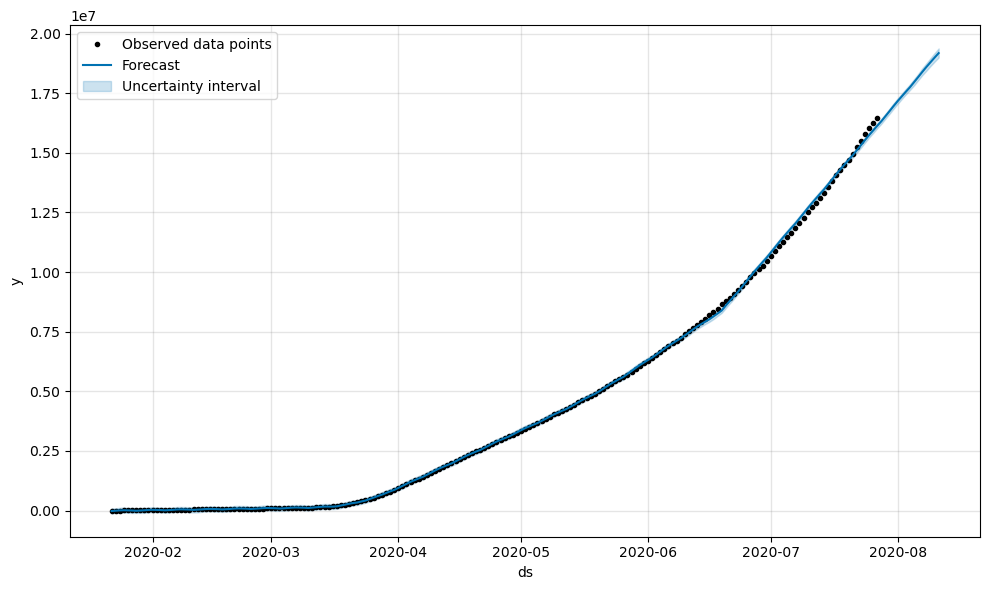

In [144]:
# y(t)-forecast-yhat
# g(t)-trends-trend
# s(t)-seasonality-yearly
# h(t)-holiday effects-weekly
# e(t)-error term-additive terms

model.plot(forecast,include_legend=True)
plt.show()